In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn as nn
from torchvision import datasets,transforms
import torch.nn.functional as F
import sys
sys.path.append("../code/")
from dataloader import APPLIANCE_ORDER, get_train_test
from sklearn.metrics import mean_absolute_error
import os
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../code/')
%matplotlib inline
import itertools
from pathlib import Path

In [2]:
tensor = np.load("../2015-5appliances.numpy.npy")
dr = tensor[:, 3]

(array([  1.74699000e+05,   2.18000000e+03,   1.91800000e+03,
          1.58800000e+03,   1.20900000e+03,   6.58000000e+02,
          2.87000000e+02,   1.65000000e+02,   5.80000000e+01,
          2.20000000e+01]),
 array([    0.        ,   436.41166992,   872.82333984,  1309.23500977,
         1745.64667969,  2182.05834961,  2618.47001953,  3054.88168945,
         3491.29335937,  3927.7050293 ,  4364.11669922]),
 <a list of 10 Patch objects>)

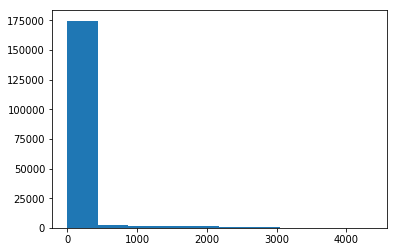

In [14]:
# for dryer
plt.hist(dr.reshape(1, -1)[0])

In [57]:
hvac = tensor[:, 1]
fridge = tensor[: ,2]

In [62]:
hvac.max(axis=1).max(axis=1).mean()*0.1

273.18536700080421

In [63]:
fridge.max(axis=1).max(axis=1).mean()*0.1

25.11936264038086

In [64]:
dr.max(axis=1).max(axis=1).mean()*0.1

299.77433740952438

In [65]:
dw.max(axis=1).max(axis=1).mean()*0.1

67.115244990411938

In [66]:
mw.max(axis=1).max(axis=1).mean()*0.1

31.462867557301241

In [83]:
on_threshold = {}
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    app = tensor[:, idx+1, :, :]
    on_threshold[appliance] = app.max(axis=1).max(axis=1).mean()*0.14

In [84]:
on_threshold

{'dr': 419.68407237333417,
 'dw': 93.96134298657671,
 'fridge': 35.167107696533208,
 'hvac': 382.45951380112592,
 'mw': 44.048014580221739}

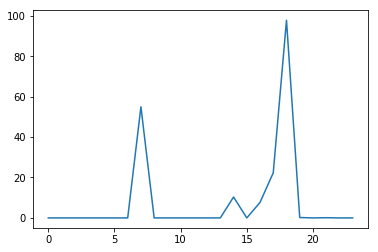

In [43]:
pd.Series(mw[0][0]).plot()

(array([  1.75940000e+05,   1.31700000e+03,   1.18500000e+03,
          1.47000000e+03,   1.10500000e+03,   7.48000000e+02,
          4.66000000e+02,   3.31000000e+02,   2.07000000e+02,
          1.50000000e+01]),
 array([    0.        ,   102.1666687 ,   204.3333374 ,   306.5000061 ,
          408.6666748 ,   510.83334351,   613.00001221,   715.16668091,
          817.33334961,   919.50001831,  1021.66668701]),
 <a list of 10 Patch objects>)

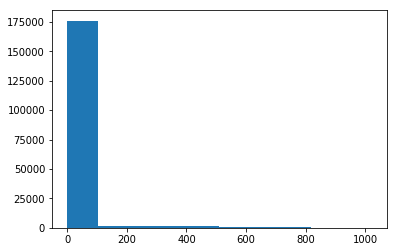

In [10]:
# for dw
dw = tensor[:, 4]
plt.hist(dw.reshape(1, -1)[0])

(array([  1.80444000e+05,   1.85600000e+03,   3.36000000e+02,
          7.60000000e+01,   2.80000000e+01,   3.30000000e+01,
          5.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          1.00000000e+00]),
 array([   0.        ,   98.05666504,  196.11333008,  294.16999512,
         392.22666016,  490.2833252 ,  588.33999023,  686.39665527,
         784.45332031,  882.50998535,  980.56665039]),
 <a list of 10 Patch objects>)

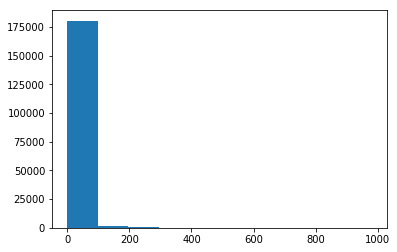

In [11]:
# for mw
mw = tensor[:, 5]
plt.hist(mw.reshape(1, -1)[0])